In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import datetime as dt

electricity_data_to_load = "Resources/complete_dataset.csv"
electricity_data = pd.read_csv(electricity_data_to_load)
electricity_data.head(2)


,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.03,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.01,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N


In [2]:
electricity_data_df = electricity_data.rename(columns={"date":"Date", "demand":"Demand (MWh)", "RRP": "RRP (AUD/MWh)",
                                                       "min_temperature":"Min Temperature", "max_temperature":"Max temperature",
                                                       "solar_exposure":"Total Sunlight Energy (MJ/m^2)", "rainfall": "Rainfall (mm)",
                                                      "school_day":"School Day", "holiday":"Holiday"})
electricity_data_df.head(2)

,Date,Demand (MWh),RRP (AUD/MWh),demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,Min Temperature,Max temperature,Total Sunlight Energy (MJ/m^2),Rainfall (mm),School Day,Holiday
0,2015-01-01,99635.03,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.01,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N


In [3]:
electricity_data_clean = electricity_data_df.drop(electricity_data_df.columns[[3,4,5,6,7]],axis=1)

In [4]:
#Dropping rows with missing values
electricity_data_clean = electricity_data_clean.dropna()

In [5]:
electricity_data.head()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


In [6]:
#Removing rows with large price outliers
electricity_data_clean.sort_values("RRP (AUD/MWh)").tail(20)
electricity_data_clean = electricity_data_clean.loc[electricity_data_clean["RRP (AUD/MWh)"] <= 200, :]

The P-value is: 2.0413552877954313e-30
The r-squared is: 0.06
The correlation coefficient is : 0.247


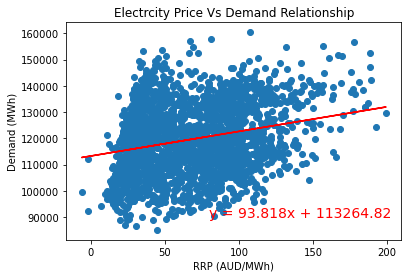

In [7]:
#Getting demand and price data to create scatterplot and check for correlation.
demand = electricity_data_clean["Demand (MWh)"]
price = electricity_data_clean["RRP (AUD/MWh)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(price, demand)
regress_values = price * slope + intercept
line_eq = (f'y = {round(slope,3)}x + {round(intercept,2)}')
plt.scatter(price, demand)
plt.plot(price, regress_values,"red")
plt.annotate(line_eq,(80,90000), color="red",fontsize=14)
plt.title("Electrcity Price Vs Demand Relationship")
plt.xlabel("RRP (AUD/MWh)")
plt.ylabel("Demand (MWh)")
print(f"The P-value is: {(pvalue)}")
print(f"The r-squared is: {round(rvalue**2,2)}")
print(f'The correlation coefficient is : {round(rvalue,3)}')


The P-value is: 3.030363958530687e-43
The r-squared is: 0.09
The correlation coefficient is : -0.295


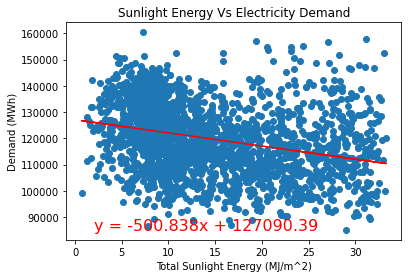

In [8]:
sunlight= electricity_data_clean["Total Sunlight Energy (MJ/m^2)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(sunlight, demand)
regress_values = sunlight * slope + intercept
line_eq = (f'y = {round(slope,3)}x + {round(intercept,2)}')
plt.scatter(sunlight, demand)
plt.plot(sunlight, regress_values,"red")
plt.annotate(line_eq,(2,85000), color="red",fontsize=16)
plt.title("Sunlight Energy Vs Electricity Demand")
plt.xlabel("Total Sunlight Energy (MJ/m^2)")
plt.ylabel("Demand (MWh)")
print(f"The P-value is: {(pvalue)}")
print(f"The r-squared is: {round(rvalue**2,2)}")
print(f'The correlation coefficient is : {round(rvalue,3)}')

In [9]:
solar_bins = pd.cut(electricity_data_clean["Total Sunlight Energy (MJ/m^2)"], bins=2, 
                                        labels=("Low Sunlight", "High Sunlight"))
solar_bins

0       High Sunlight
1       High Sunlight
2       High Sunlight
3       High Sunlight
4       High Sunlight
            ...      
2101    High Sunlight
2102    High Sunlight
2103     Low Sunlight
2104     Low Sunlight
2105     Low Sunlight
Name: Total Sunlight Energy (MJ/m^2), Length: 2084, dtype: category
Categories (2, object): [Low Sunlight < High Sunlight]

In [13]:
electricity_data_clean["Sunlight Level"] = solar_bins

In [33]:
low_sunlight = electricity_data_clean.loc[electricity_data_clean["Sunlight Level"] == "Low Sunlight",:]
high_sunlight = electricity_data_clean.loc[electricity_data_clean["Sunlight Level"] == "High Sunlight",:]

In [18]:
electricity_data_clean["Date"] = pd.to_datetime(electricity_data_clean['Date'])

In [26]:
data_2015 = electricity_data_clean[electricity_data_clean['Date'].dt.year == 2015]
data_2020 = electricity_data_clean[electricity_data_clean['Date'].dt.year == 2020]

In [57]:
data_2020_demand = data_2020.groupby("Sunlight Level")["Demand (MWh)"].mean()
data_2015_demand = data_2015.groupby("Sunlight Level")["Demand (MWh)"].mean()

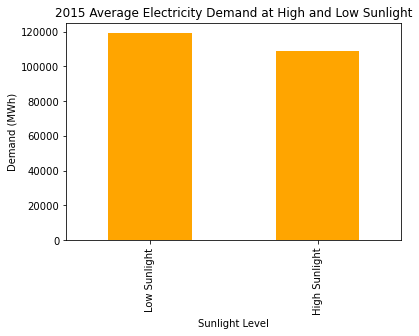

Average demand (MWh) on low sunlight days: 127926.0
Average demand (MWh) on high sunlight days: 119880.0
6.71 % increase when moving from high sunlight to low sunlight.


In [97]:
sunlight_2015_plot = data_2020_demand.plot.bar(color = "orange")
plt.title("2015 Average Electricity Demand at High and Low Sunlight")
plt.xlabel("Sunlight Level")
plt.ylabel("Demand (MWh)")
plt.show()
print(f'Average demand (MWh) on low sunlight days: {round(data_2015_demand["Low Sunlight"])}')
print(f'Average demand (MWh) on high sunlight days: {round(data_2015_demand["High Sunlight"])}')
percent_change_2015 = (data_2015_demand["Low Sunlight"] - data_2015_demand["High Sunlight"]) / data_2015_demand["High Sunlight"]
print(f'{round(percent_change_2015*100,2)} % increase when moving from high sunlight to low sunlight.')

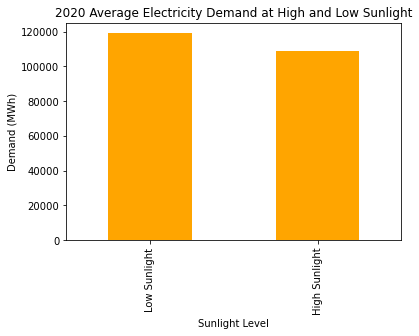

Average demand (MWh) on low sunlight days: 119135.0
Average demand (MWh) on high sunlight days: 109105.0
9.19 % increase in electricity demand when moving from high sunlight to low sunlight.


In [98]:
sunlight_2020_plot = data_2020_demand.plot.bar(color="orange")
plt.title("2020 Average Electricity Demand at High and Low Sunlight")
plt.xlabel("Sunlight Level")
plt.ylabel("Demand (MWh)")
plt.show()
print(f'Average demand (MWh) on low sunlight days: {round(data_2020_demand["Low Sunlight"])}')
print(f'Average demand (MWh) on high sunlight days: {round(data_2020_demand["High Sunlight"])}')
percent_change_2020 = (data_2020_demand["Low Sunlight"] - data_2020_demand["High Sunlight"]) / data_2020_demand["High Sunlight"]
print(f'{round(percent_change_2020*100,2)} % increase in electricity demand when moving from high sunlight to low sunlight.')